Import Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import sklearn
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# ML Models
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score,calinski_harabasz_score,davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

DATA EXPLORATION

Load Data

In [48]:
df = pd.read_csv(r"C:\Users\Msi\OneDrive\Documents\NTI\AI-AU25\project 3(unsupervised)\Data\data.csv", encoding="ISO-8859-1")

In [49]:
print("Shape of dataset:", df.shape)

Shape of dataset: (541909, 8)


In [50]:
print("\nFirst 5 rows:\n", df.head())


First 5 rows:
   InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [51]:
print("\nLast 5 rows:\n", df.tail())


Last 5 rows:
        InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID Country  
541904  12/9/2011 12:50       0.85     12680.0  France  
541905  12/9/2011 12:50       2.10     12680.0  France  
541906  12/9/2011 12:50       4.15     12680.0  France  
541907  12/9/2011 12:50       4.15     12680.0  France  
541908  12/9/2011 12:50       4.95     12680.0  France  


In [52]:
print("\nInfo:\n")
print(df.info())


Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [53]:
print("\nData types:\n", df.dtypes)  


Data types:
 InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [54]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
             Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


check null values

In [55]:
print("Missing values before:\n", df.isnull().sum())

Missing values before:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


check dublicated

In [56]:
# Check duplicates count
print("Duplicated rows before:", df.duplicated().sum())

Duplicated rows before: 5268


Check the outliers

In [57]:
print("Before cleaning:")
print("Negative or zero Quantity:", (df['Quantity'] <= 0).sum())
print("Negative or zero UnitPrice:", (df['UnitPrice'] <= 0).sum())

Before cleaning:
Negative or zero Quantity: 10624
Negative or zero UnitPrice: 2517


 Check credit notes

In [58]:
print("Credit Notes (Invoices starting with C):", df['InvoiceNo'].astype(str).str.startswith('C').sum())

Credit Notes (Invoices starting with C): 9288


In [59]:
print("Unique Countries:", df['Country'].unique())

Unique Countries: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


Unique Customers & Countries

In [60]:
print("\nUnique Customers:", df['CustomerID'].nunique())
print("Unique Countries:", df['Country'].nunique())
print("Top 5 Countries:\n", df['Country'].value_counts().head())


Unique Customers: 4372
Unique Countries: 38
Top 5 Countries:
 Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: count, dtype: int64


Data Visualization

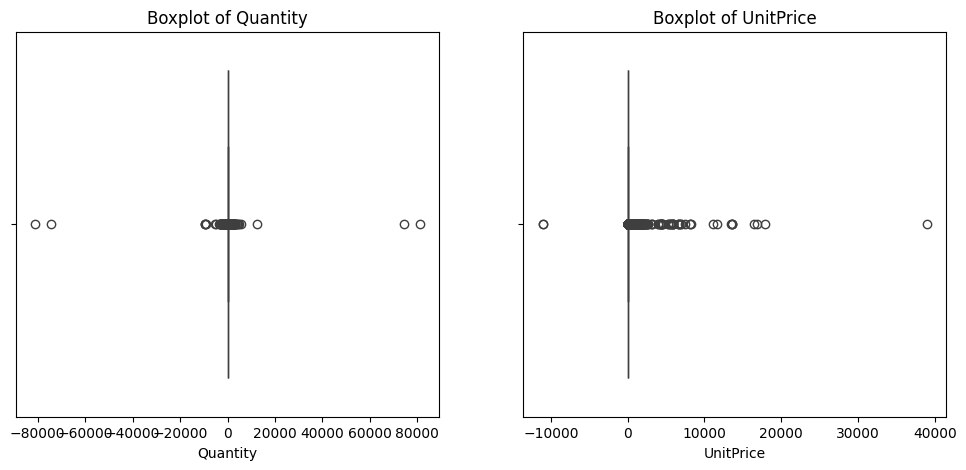

In [61]:
# check the outliers
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['Quantity'])
plt.title("Boxplot of Quantity")

plt.subplot(1,2,2)
sns.boxplot(x=df['UnitPrice'])
plt.title("Boxplot of UnitPrice")

plt.show()

Data cleaning

Handle the missing values & dublicated values

In [62]:
# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

In [63]:
df['CustomerID'] = df['CustomerID'].astype(int)

In [64]:
# Drop Description column (not useful for modeling)
df = df.drop(columns=['Description'])

In [65]:
# Drop duplicates
df = df.drop_duplicates()

In [66]:
print("Duplicated rows after:", df.duplicated().sum())

Duplicated rows after: 0


In [67]:
print("Missing values after:\n", df.isnull().sum())

Missing values after:
 InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


handle the outliers

In [68]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [69]:
print("\nAfter cleaning:")
print("Negative or zero Quantity:", (df['Quantity'] <= 0).sum())
print("Negative or zero UnitPrice:", (df['UnitPrice'] <= 0).sum())


After cleaning:
Negative or zero Quantity: 0
Negative or zero UnitPrice: 0


In [70]:
# Drop rows with "Unspecified"
df = df[df['Country'] != "Unspecified"]

# Drop rare countries (very low frequency)
rare_countries = ["European Community", "RSA"]
df = df[~df['Country'].isin(rare_countries)]

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

In [71]:
# Check unique countries after cleaning
print("Unique Countries after cleaning:", df['Country'].unique())
print("Number of Countries after cleaning:", df['Country'].nunique())

Unique Countries after cleaning: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Israel' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Brazil' 'USA' 'Bahrain' 'Malta']
Number of Countries after cleaning: 34


In [72]:
# Show country distribution
country_counts = df['Country'].value_counts()
print(country_counts.head(10))  

Country
United Kingdom    349201
Germany             9025
France              8326
EIRE                7226
Spain               2479
Netherlands         2359
Belgium             2031
Switzerland         1841
Portugal            1453
Australia           1181
Name: count, dtype: int64


In [73]:
print("New shape of dataset:", df.shape)

New shape of dataset: (392332, 7)


In [74]:
# Remove very rare countries
country_counts = df['Country'].value_counts()
rare_countries = country_counts[country_counts < 50].index  # any country with less than 50 records
df = df[~df['Country'].isin(rare_countries)]

Feature Engineering

In [75]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [76]:
# Extract RFM features
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                     # Frequency
    'TotalPrice': 'sum'                                         # Monetary
}).reset_index()

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)


In [77]:
for col in ['Recency','Frequency','Monetary']:
    upper_limit = rfm[col].quantile(0.95)
    rfm = rfm[rfm[col] <= upper_limit]

Encoding

In [78]:
# One-hot encoding for Country
country_encoded = pd.get_dummies(df[['CustomerID','Country']].drop_duplicates(), columns=['Country'])
df_final = pd.merge(rfm, country_encoded, on='CustomerID', how='left')

In [79]:
print("Final dataset for modeling:", df_final.shape)
print(df_final.head())

Final dataset for modeling: (3730, 32)
   CustomerID  Recency  Frequency  Monetary  Country_Australia  \
0       12348       75          4   1797.24              False   
1       12349       19          1   1757.55              False   
2       12350      310          1    334.40              False   
3       12352       36          8   2506.04              False   
4       12354      232          1   1079.40              False   

   Country_Austria  Country_Belgium  Country_Canada  Country_Channel Islands  \
0            False            False           False                    False   
1            False            False           False                    False   
2            False            False           False                    False   
3            False            False           False                    False   
4            False            False           False                    False   

   Country_Cyprus  ...  Country_Norway  Country_Poland  Country_Portugal  \
0      

Scaling


In [80]:
X = df_final.drop(columns=['CustomerID'])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [81]:
print(X_scaled[:5])

[[0.23870968 0.23076923 0.44574151 0.         0.         0.
  0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.05806452 0.         0.43587723 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.99677419 0.         0.08217745 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.11290323 0.53846154 0.62190173 0.         0.         0

Elbow Method 

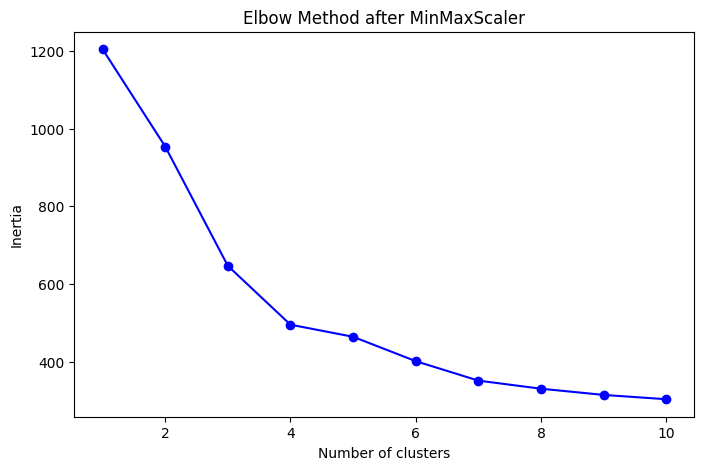

Optimal number of clusters: 4


In [82]:
# Elbow Method after scaling
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

#Elbow
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method after MinMaxScaler')
plt.show()

# KneeLocator 
knee = KneeLocator(K, inertia, curve='convex', direction='decreasing')
print("Optimal number of clusters:", knee.elbow)


Best k (Elbow point): 4


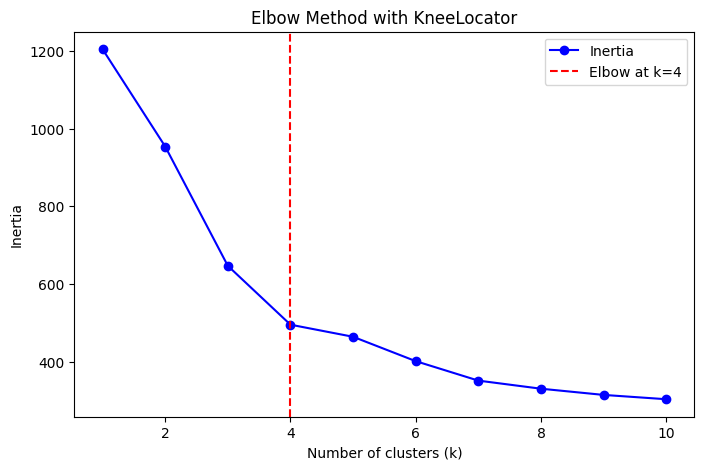

In [83]:
knee = KneeLocator(list(K), inertia, curve='convex', direction='decreasing')
best_k = knee.elbow
print("Best k (Elbow point):", best_k)

plt.figure(figsize=(8,5))
plt.plot(list(K), inertia, 'bo-', label='Inertia')
plt.axvline(best_k, color='r', linestyle='--', label=f'Elbow at k={best_k}')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method with KneeLocator")
plt.legend()
plt.show()

In [84]:
# Apply KMeans with the best number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=41)
df_final['Cluster'] = kmeans.fit_predict(X_scaled)

In [85]:
# Show first 5 rows with cluster labels
print(df_final.head())

   CustomerID  Recency  Frequency  Monetary  Country_Australia  \
0       12348       75          4   1797.24              False   
1       12349       19          1   1757.55              False   
2       12350      310          1    334.40              False   
3       12352       36          8   2506.04              False   
4       12354      232          1   1079.40              False   

   Country_Austria  Country_Belgium  Country_Canada  Country_Channel Islands  \
0            False            False           False                    False   
1            False            False           False                    False   
2            False            False           False                    False   
3            False            False           False                    False   
4            False            False           False                    False   

   Country_Cyprus  ...  Country_Poland  Country_Portugal  Country_Singapore  \
0           False  ...           False     

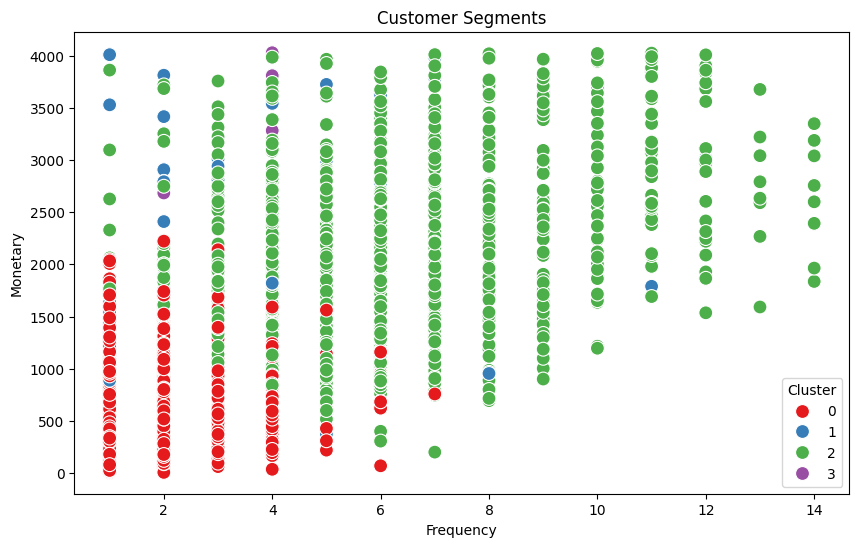

In [86]:
# Scatter plot of clusters (RFM example: Frequency vs Monetary)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_final, 
                x='Frequency', 
                y='Monetary', 
                hue='Cluster', 
                palette='Set1', 
                s=100)
plt.title('Customer Segments')
plt.show()

In [87]:
# Cluster summary (mean values)
cluster_summary = df_final.groupby('Cluster').mean().round(1)
print("\nCluster Summary (Means):\n", cluster_summary)



Cluster Summary (Means):
          CustomerID  Recency  Frequency  Monetary  Country_Australia  \
Cluster                                                                
0           15588.8    106.7        1.8     480.4                0.0   
1           12847.6     86.2        2.8    1270.1                0.0   
2           15501.9     31.4        6.0    2002.0                0.0   
3           12740.3     78.5        3.0    1252.9                0.0   

         Country_Austria  Country_Belgium  Country_Canada  \
Cluster                                                     
0                    0.0              0.0             0.0   
1                    0.0              0.1             0.0   
2                    0.0              0.0             0.0   
3                    0.0              0.0             0.0   

         Country_Channel Islands  Country_Cyprus  ...  Country_Norway  \
Cluster                                           ...                   
0                          

In [88]:
# Detailed cluster profile
cluster_profile = df_final.groupby('Cluster').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max']
}).round(1)

print("\nCluster Profile (Detailed Stats):\n", cluster_profile)


Cluster Profile (Detailed Stats):
         Recency          Frequency         Monetary               
           mean min  max      mean min max     mean    min     max
Cluster                                                           
0         106.7   1  311       1.8   1   7    480.4    3.8  2222.2
1          86.2   1  311       2.8   1  12   1270.1   51.6  4008.6
2          31.4   1  306       6.0   1  14   2002.0  201.1  4023.7
3          78.5   1  311       3.0   1  12   1252.9  125.2  4027.4



GAUSSIAN MIXTURE MODEL (GMM) IMPLEMENTATION

In [89]:
# Range of k (number of components) to try
K_gmm = range(1, 11)
cov_types = ['full', 'tied', 'diag', 'spherical']

results = []
best_bic = np.inf
best_cfg = None
best_gmm = None

# Loop over covariance types and k to find the best model by BIC
for cov in cov_types:
    for k in K_gmm:
        gmm = GaussianMixture(n_components=k, covariance_type=cov, random_state=42, n_init=5)
        gmm.fit(X_scaled)
        bic = gmm.bic(X_scaled)
        aic = gmm.aic(X_scaled)
        results.append((k, cov, bic, aic))
        if bic < best_bic:
            best_bic = bic
            best_cfg = (k, cov)
            best_gmm = gmm
# Save results as DataFrame
gmm_sel = pd.DataFrame(results, columns=['k', 'covariance', 'BIC', 'AIC']).sort_values(['BIC'])
print("\nTop 10 configs by lowest BIC:\n", gmm_sel.head(10))

print(f"\nBest GMM by BIC -> k={best_cfg[0]}, covariance_type='{best_cfg[1]}', BIC={best_bic:.2f}")

# If KneeLocator failed earlier (best_k = None), use fallback
if 'best_k' not in globals() or best_k is None:
    best_k = 3  # fallback



Top 10 configs by lowest BIC:
      k covariance           BIC           AIC
29  10       diag -1.244209e+06 -1.248124e+06
28   9       diag -1.236962e+06 -1.240485e+06
27   8       diag -1.228453e+06 -1.231584e+06
26   7       diag -1.221252e+06 -1.223991e+06
25   6       diag -1.208556e+06 -1.210903e+06
9   10       full -1.208482e+06 -1.241339e+06
24   5       diag -1.207926e+06 -1.209881e+06
8    9       full -1.200869e+06 -1.230440e+06
7    8       full -1.195854e+06 -1.222139e+06
6    7       full -1.192739e+06 -1.215737e+06

Best GMM by BIC -> k=10, covariance_type='diag', BIC=-1244209.10


In [90]:
# Fit the final GMM using the best config
gmm = best_gmm
gmm_labels = gmm.predict(X_scaled)
gmm_probs = gmm.predict_proba(X_scaled)  # membership probabilities

# Add cluster labels and confidence scores to final DataFrame
df_final['GMM_Cluster'] = gmm_labels
df_final['GMM_Confidence'] = gmm_probs.max(axis=1)


In [91]:
# Evaluation Metrics: GMM vs KMeans

def safe_silhouette(X, labels):
    """Safe silhouette calculation (avoids errors if only 1 cluster or singleton clusters)."""
    unique = np.unique(labels)
    if len(unique) < 2:
        return np.nan
    counts = np.bincount(labels)
    if (counts <= 1).any():
        return np.nan
    return silhouette_score(X, labels)

def all_metrics(X, labels):
    """Compute clustering evaluation metrics."""
    return {
        'silhouette': safe_silhouette(X, labels),
        'calinski_harabasz': calinski_harabasz_score(X, labels) if len(np.unique(labels)) > 1 else np.nan,
        'davies_bouldin': davies_bouldin_score(X, labels) if len(np.unique(labels)) > 1 else np.nan
    }

km_metrics = all_metrics(X_scaled, df_final['Cluster'].values)       # from KMeans
gmm_metrics = all_metrics(X_scaled, df_final['GMM_Cluster'].values)  # from GMM

# Adjusted Rand Index (agreement between KMeans and GMM)
ari_km_gmm = adjusted_rand_score(df_final['Cluster'].values, df_final['GMM_Cluster'].values)

print("\n=== Clustering Quality (higher Silhouette & CH are better; lower DB is better) ===")
print("KMeans:", km_metrics)
print("GMM   :", gmm_metrics)
print(f"\nAdjusted Rand Index (KMeans vs GMM): {ari_km_gmm:.4f}")

# Contingency table (cross-tabulation) to compare clusters
ct = pd.crosstab(df_final['Cluster'], df_final['GMM_Cluster'], rownames=['KMeans'], colnames=['GMM'])
print("\nContingency Table (KMeans vs GMM):\n", ct)


=== Clustering Quality (higher Silhouette & CH are better; lower DB is better) ===
KMeans: {'silhouette': np.float64(0.3792891691921143), 'calinski_harabasz': np.float64(1253.8810643939485), 'davies_bouldin': np.float64(1.2629735451622568)}
GMM   : {'silhouette': np.float64(0.16040883235065378), 'calinski_harabasz': np.float64(796.4750900316944), 'davies_bouldin': np.float64(2.0144558917474185)}

Adjusted Rand Index (KMeans vs GMM): 0.3944

Contingency Table (KMeans vs GMM):
 GMM       0    1    2   3   4   5   6     7   8   9
KMeans                                             
0       527  736   19   0   0   0   0  1132   0   0
1         0    0    0   0  62  58  21     0  25  81
2        25   95  875   0   0   0   0     0   0   0
3         0    0    0  74   0   0   0     0   0   0


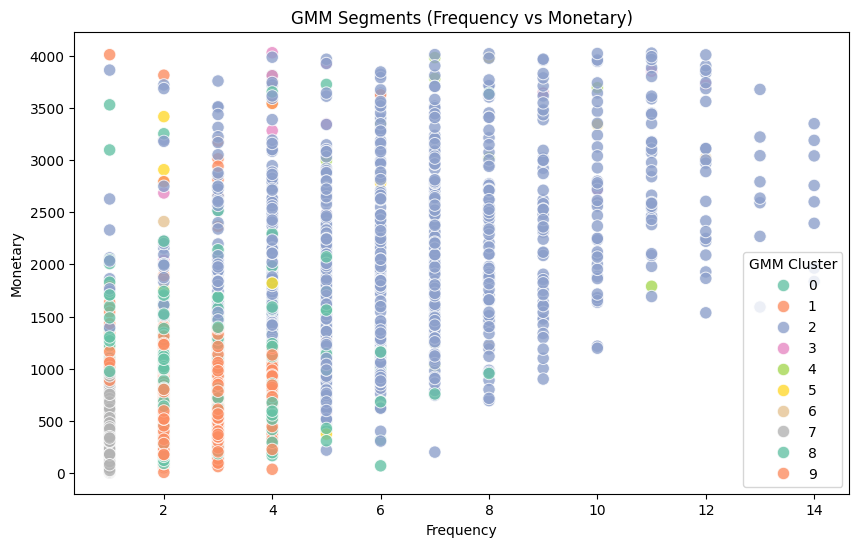

In [92]:
# Visualization of GMM clusters in RFM space

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_final,
                x='Frequency',
                y='Monetary',
                hue='GMM_Cluster',
                palette='Set2',
                s=80,
                alpha=0.8)
plt.title('GMM Segments (Frequency vs Monetary)')
plt.legend(title='GMM Cluster')
plt.show()

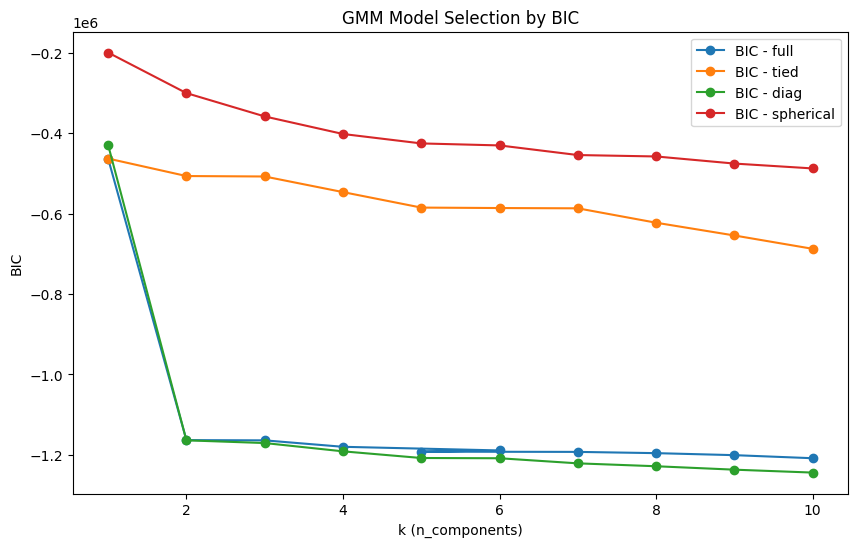

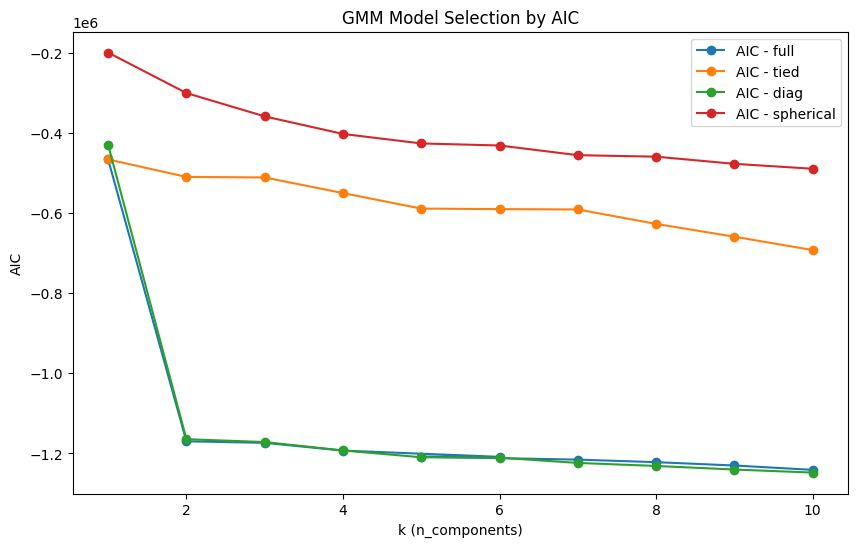

In [93]:
# Plot BIC and AIC curves for model selection

plt.figure(figsize=(10,6))
for cov in cov_types:
    sub = gmm_sel[gmm_sel['covariance'] == cov]
    plt.plot(sub['k'], sub['BIC'], 'o-', label=f'BIC - {cov}')
plt.xlabel('k (n_components)')
plt.ylabel('BIC')
plt.title('GMM Model Selection by BIC')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
for cov in cov_types:
    sub = gmm_sel[gmm_sel['covariance'] == cov]
    plt.plot(sub['k'], sub['AIC'], 'o-', label=f'AIC - {cov}')
plt.xlabel('k (n_components)')
plt.ylabel('AIC')
plt.title('GMM Model Selection by AIC')
plt.legend()
plt.show()

In [94]:
# Summary table: KMeans vs GMM

summary = pd.DataFrame({
    'Model': ['KMeans', 'GMM'],
    'Silhouette': [km_metrics['silhouette'], gmm_metrics['silhouette']],
    'Calinski-Harabasz': [km_metrics['calinski_harabasz'], gmm_metrics['calinski_harabasz']],
    'Davies-Bouldin': [km_metrics['davies_bouldin'], gmm_metrics['davies_bouldin']]
})
print("\n=== Summary (KMeans vs GMM) ===\n", summary)


=== Summary (KMeans vs GMM) ===
     Model  Silhouette  Calinski-Harabasz  Davies-Bouldin
0  KMeans    0.379289        1253.881064        1.262974
1     GMM    0.160409         796.475090        2.014456


Save the model


In [96]:
# Create models folder if not exists
os.makedirs("models", exist_ok=True)

# Save inside models folder
joblib.dump(kmeans, "models/kmeans_model.pkl")
joblib.dump(gmm, "models/gmm_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")

print("✅ Models and scaler saved in 'models/' folder")

✅ Models and scaler saved in 'models/' folder
